In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [10]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences # used to ensure fixed length for all reviews
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding

In [3]:
(x_train,y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [4]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [5]:
x_train = pad_sequences(x_train,maxlen=100)
x_test = pad_sequences(x_test,maxlen=100)

In [7]:
x_train.shape # 25000 rows with all length of 100 

(25000, 100)

In [8]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [9]:
vocab_size = 20000
embed_size = 128

In [14]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape=(100,)))
model.add(LSTM(units=60, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

In [15]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, verbose=1, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
196/196 [==============================] - 18s 70ms/step - loss: 0.4252 - accuracy: 0.7954 - val_loss: 0.3401 - val_accuracy: 0.8514
Epoch 2/5
196/196 [==============================] - 13s 66ms/step - loss: 0.2271 - accuracy: 0.9136 - val_loss: 0.3568 - val_accuracy: 0.8458
Epoch 3/5
196/196 [==============================] - 13s 64ms/step - loss: 0.1464 - accuracy: 0.9477 - val_loss: 0.4344 - val_accuracy: 0.8379
Epoch 4/5
196/196 [==============================] - 12s 64ms/step - loss: 0.0942 - accuracy: 0.9671 - val_loss: 0.5021 - val_accuracy: 0.8278
Epoch 5/5
196/196 [==============================] - 13s 64ms/step - loss: 0.0708 - accuracy: 0.9768 - val_loss: 0.5426 - val_accuracy: 0.8295


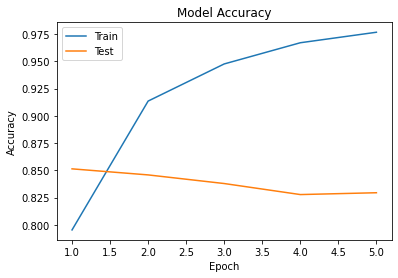

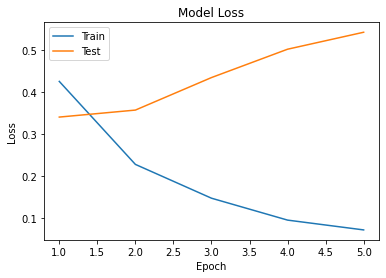

In [20]:
epoch_range = range(1,6)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

epoch_range = range(1,6)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()